Импортируем необходимые библиотеки:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from tabulate import tabulate
import datetime

Создаём дата-фрейм, используя путь к excel файлу:

In [2]:
inf_data = pd.read_excel(r"Инфляция и ключевая ставка Банка России.xlsx")

Для начала рассмотрим содержимое файла: выведем первые и последние 5 строк для просмотра (применим табуляцию для лучшей наглядности):

In [3]:
print(tabulate(inf_data.head(5), headers='keys', tablefmt='psql'))
print(tabulate(inf_data.tail(5), headers='keys', tablefmt='psql'))

+----+---------+------------------------------+-------------------+--------------------+
|    |    Дата |   Ключевая ставка, % годовых |   Инфляция, % г/г |   Цель по инфляции |
|----+---------+------------------------------+-------------------+--------------------|
|  0 | 12.2023 |                           16 |              7.42 |                  4 |
|  1 | 11.2023 |                           15 |              7.48 |                  4 |
|  2 | 10.2023 |                           15 |              6.69 |                  4 |
|  3 |  9.2023 |                           13 |              6    |                  4 |
|  4 |  8.2023 |                           12 |              5.15 |                  4 |
+----+---------+------------------------------+-------------------+--------------------+
+-----+---------+------------------------------+-------------------+--------------------+
|     |    Дата |   Ключевая ставка, % годовых |   Инфляция, % г/г |   Цель по инфляции |
|-----+---------+--

Представим дату в более удобном формате - поменяем тип дпнных float на datettime для более удобного представления на графике:

In [4]:
# генерируем даты в нужном диапазоне и помещаем их в пустой список
dates = []
for i in range(2023, 2012, -1):
    for j in range(12, 0, -1):
        dates.append(datetime.date(i, j, 1))  # проставим во всех датах первый день месяца
dates = dates[:-8]  # так как данные за 2013 год в датасете представлены с 9 по 12 месяц, отсекаем ненужные 8 месяцев с помощью среза 
df = inf_data.copy()  # создаём копию исходного дата-фрейма, чтобы осуществить проверку полученных значений
df['Дата'] = dates
#  проверяем, совпадают ли данные в двух дата-фреймах: если по всем строкам значения совпадают, то сумма будет равна количеству строк
print(f"Проверка условий: {(inf_data['Инфляция, % г/г'] == df['Инфляция, % г/г']).sum() == inf_data.shape[0], df.shape[0] == inf_data.shape[0]}")

Проверка условий: (True, True)


Так как данные совпадают, можно изменить исходный дата-фрейм. Изменим индексы на дату и отсортируем их в хронологическом порядке:

In [5]:
inf_data = df
inf_data = inf_data.set_index('Дата')
inf_data = inf_data.sort_index()
print(tabulate(inf_data.head(10), headers='keys', tablefmt='psql'))

+------------+------------------------------+-------------------+--------------------+
| Дата       |   Ключевая ставка, % годовых |   Инфляция, % г/г |   Цель по инфляции |
|------------+------------------------------+-------------------+--------------------|
| 2013-09-01 |                          5.5 |              6.14 |                nan |
| 2013-10-01 |                          5.5 |              6.27 |                nan |
| 2013-11-01 |                          5.5 |              6.5  |                nan |
| 2013-12-01 |                          5.5 |              6.47 |                nan |
| 2014-01-01 |                          5.5 |              6.07 |                nan |
| 2014-02-01 |                          5.5 |              6.21 |                nan |
| 2014-03-01 |                          7   |              6.92 |                nan |
| 2014-04-01 |                          7.5 |              7.33 |                nan |
| 2014-05-01 |                          7.5

Теперь займёмся вычислениями: начнём с расчёта среднего значения инфляции за весь исследуемый период:


In [6]:
avg_inf = round(inf_data['Инфляция, % г/г'].mean(), 2)
print(f'Среднее значение инфляции в период с 28.07.2023 по 24.01.2024 гг. составило {avg_inf}%')

Среднее значение инфляции в период с 28.07.2023 по 24.01.2024 гг. составило 7.1%


Создадим дата-фрейм, содержащий среднегодовые значения инфляции и ключевой ставки ЦБ (для лучшей наглядности применим табуляцию):

In [7]:
agg_data = inf_data[['Ключевая ставка, % годовых', 'Инфляция, % г/г']].groupby(inf_data.index.map(lambda x: x.year)).agg(['mean'])
print(tabulate(agg_data, headers="keys", tablefmt="psql"))

+--------+------------------------------------------+-------------------------------+
|   Дата |   ('Ключевая ставка, % годовых', 'mean') |   ('Инфляция, % г/г', 'mean') |
|--------+------------------------------------------+-------------------------------|
|   2013 |                                  5.5     |                       6.345   |
|   2014 |                                  8.25    |                       7.805   |
|   2015 |                                 12.5417  |                      15.555   |
|   2016 |                                 10.5417  |                       7.09167 |
|   2017 |                                  9.04167 |                       3.7     |
|   2018 |                                  7.41667 |                       2.875   |
|   2019 |                                  7.25    |                       4.475   |
|   2020 |                                  4.9375  |                       3.375   |
|   2021 |                                  5.97917 | 

Перейдём к визуализациии. Построим линейный график, чтобы посмотреть, как менялись значения в течение 10 лет (указываем размеры, название графика и его осей, выводим график на экран):

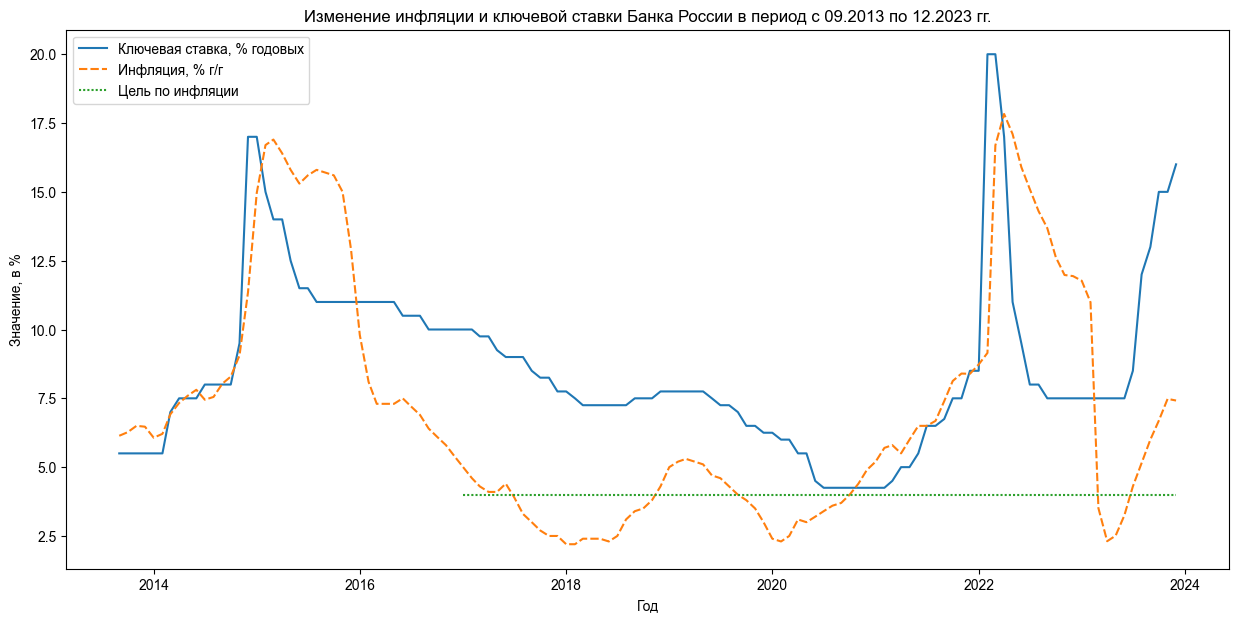

In [8]:
plt.figure(figsize=(15, 7))
plt.title('Изменение инфляции и ключевой ставки Банка России в период с 09.2013 по 12.2023 гг.')  
plt.xlabel('Год')  
plt.ylabel('Значение, в %')
sns.lineplot(data=inf_data)
sns.set_style('whitegrid')

На графике мы видим, что в периоды кризисов одновременно с ростом инфляции происходит резкое увеличение ключевой ставки на небольшой период времени, затем ключевая ставка снижается, при чём её снижение опережает уменьшение уровня инфляции

Построим график со среднегодовыми значениями инфляции и ключевой ставки ЦБ (используем ранее созданный датафрейм agg_data):

<Axes: title={'center': 'Среднегодовые значения инфляции и ключевой ставки Банка России в период с 09.2013 по 12.2023 гг.'}, xlabel='Год', ylabel='Значение, в %'>

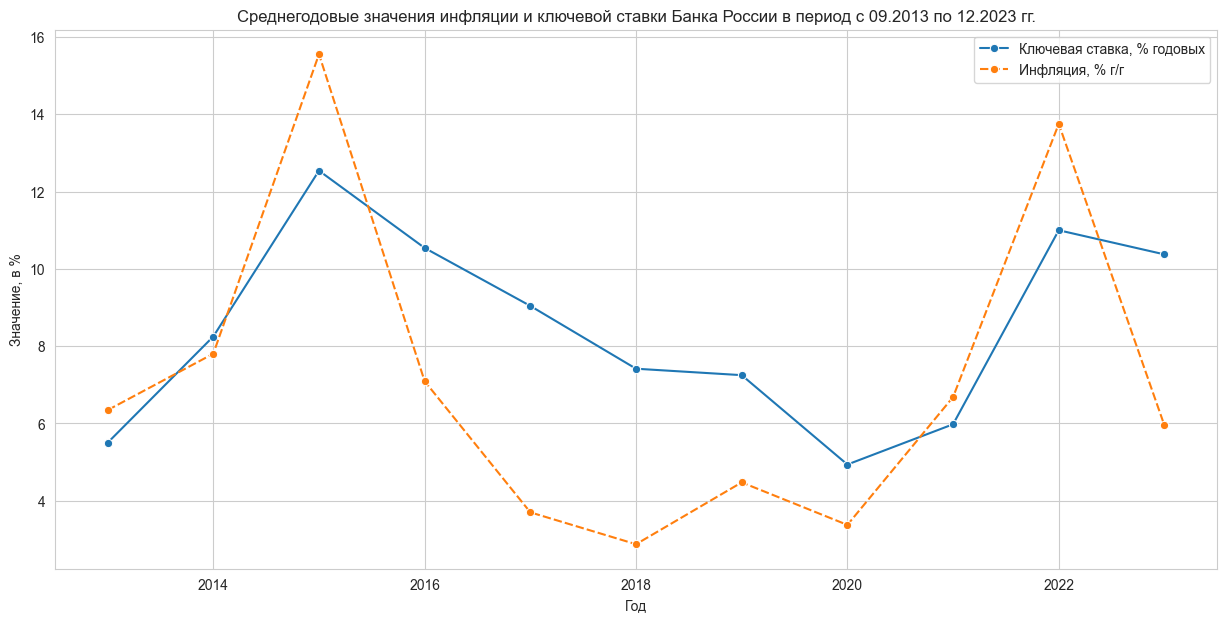

In [9]:
plt.figure(figsize=(15, 7))
plt.title('Среднегодовые значения инфляции и ключевой ставки Банка России в период с 09.2013 по 12.2023 гг.')  
plt.xlabel('Год')  
plt.ylabel('Значение, в %') 
sns.lineplot(data=agg_data, markers=['o', 'o'])

На графике мы можем наблюдать, что в периоды кризисов среднегодовое значение ключевой ставки ниже среднегодового значения инфляции

Построим график с максимальными и минимальными значениями инфляции по каждому году (используем группировку и агрегирование для получения данных):

<Axes: title={'center': 'Максимальное и минимальное значение инфляции за год в период с 09.2013 по 12.2023 гг.'}, xlabel='Год', ylabel='Значение, в %'>

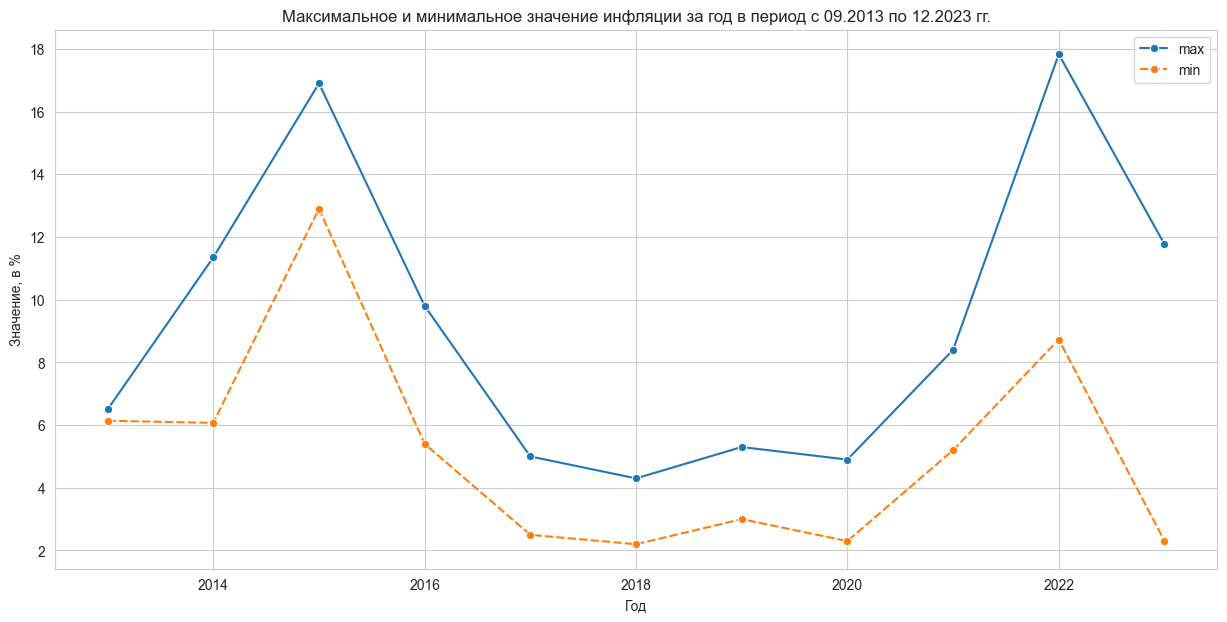

In [10]:
plt.figure(figsize=(15, 7))
plt.title('Максимальное и минимальное значение инфляции за год в период с 09.2013 по 12.2023 гг.')  
plt.xlabel('Год')  
plt.ylabel('Значение, в %') 
sns.lineplot(data=inf_data['Инфляция, % г/г'].groupby(inf_data.index.map(lambda x: x.year)).agg(['max', 'min']), markers=['o', 'o'])

На графике видно, что наибольшая разница между минимальным и максимальным значением инфляции наблюдалась в 2014, 2022 и 2023 гг., что обусловлено влиянием санкций, а наименьшая разница в 2013 г.

Построим график и рассмотрим, как менялась инфляция и ключевая ставка в 2023 году:

<Axes: title={'center': 'Изменение инфляции и ключевой ставки Банка России в 2023 гг.'}, xlabel='Дата', ylabel='Значение, в %'>

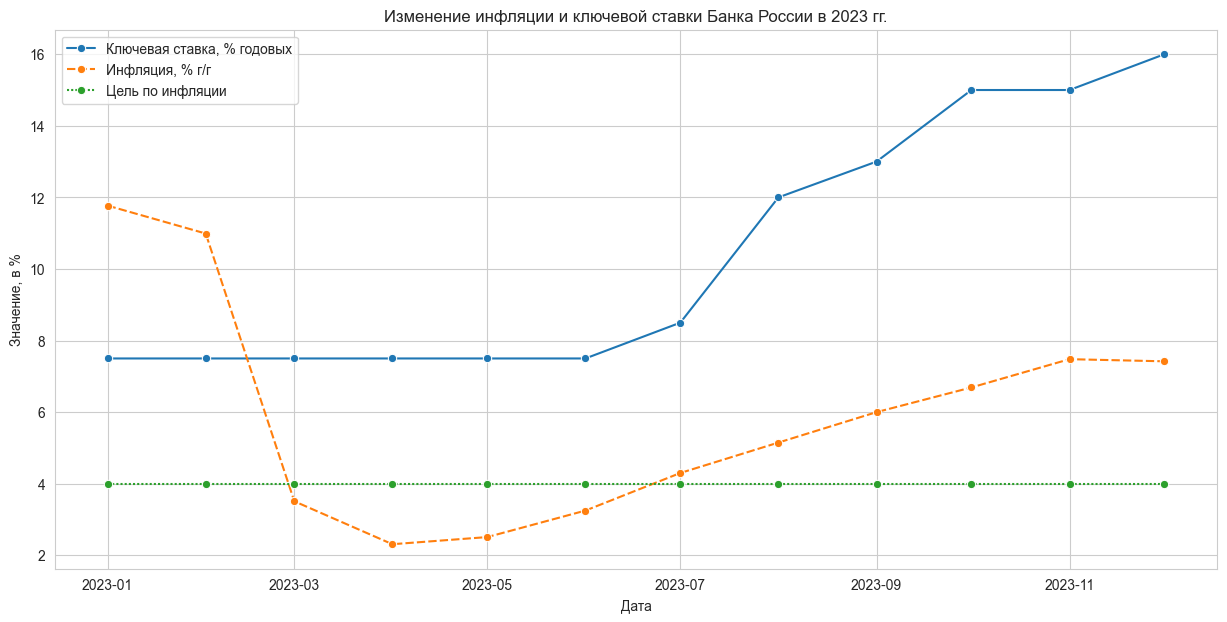

In [11]:
plt.figure(figsize=(15, 7))
plt.title('Изменение инфляции и ключевой ставки Банка России в 2023 гг.')  
plt.xlabel('Дата')  
plt.ylabel('Значение, в %') 
sns.lineplot(data=inf_data.loc[inf_data.index.map(lambda x: x.year == 2023) == True], markers=['o', 'o', 'o'])

На графике мы можем наблюдать, что в начале 2023 года инфляция постепенно снижалась, и несколько месяцев её уровень был ниже цели по инфляции, но во второй половине года инфляция снова начала заметно расти, что привело к ужесточению денежно-кредитной политиики Центрального Банка